In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model
import matplotlib.pyplot as plt
import tensorflow as tf
from models.lstm.lstm_normalize import get_lstm_data
from sklearn.preprocessing import MinMaxScaler


---

## For **build_model** function

In [3]:
# model = build_model()

---

## For **train_model** function

In [4]:
x_train, x_test, y_train, y_test, dates_train, dates_test = get_lstm_data()

In [5]:
x_train

array([[0.24652866, 0.2360286 , 0.23653478, ..., 0.24220632, 0.24548619,
        0.24839723],
       [0.2360286 , 0.23653478, 0.23678692, ..., 0.24548619, 0.24839723,
        0.24651361],
       [0.23653478, 0.23678692, 0.24394127, ..., 0.24839723, 0.24651361,
        0.24665662],
       ...,
       [0.49927177, 0.50305403, 0.50059087, ..., 0.51339226, 0.51451941,
        0.51703154],
       [0.50305403, 0.50059087, 0.50248574, ..., 0.51451941, 0.51703154,
        0.51760171],
       [0.50059087, 0.50248574, 0.5060535 , ..., 0.51703154, 0.51760171,
        0.5142955 ]])

In [6]:
print(y_train[0])

0.24651361123848506


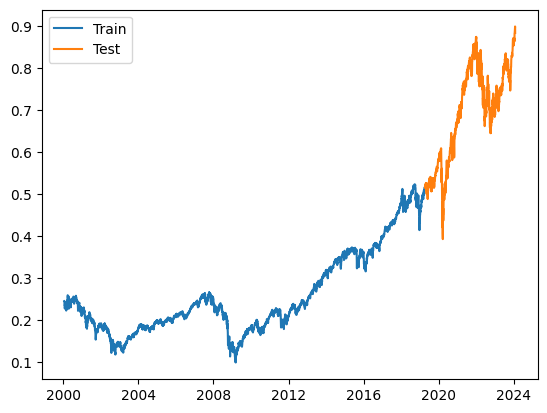

In [7]:
# plt.plot(dates_train, x_train)
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Test'])

In [8]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)


Epoch 1/10


152/152 [==============================] - 7s 10ms/step - loss: 0.0046 - mean_absolute_error: 0.0413
Epoch 2/10
152/152 [==============================] - 2s 10ms/step - loss: 6.9903e-04 - mean_absolute_error: 0.0195
Epoch 3/10
152/152 [==============================] - 2s 10ms/step - loss: 5.4311e-04 - mean_absolute_error: 0.0175
Epoch 4/10
152/152 [==============================] - 2s 11ms/step - loss: 4.9116e-04 - mean_absolute_error: 0.0163
Epoch 5/10
152/152 [==============================] - 2s 10ms/step - loss: 4.7671e-04 - mean_absolute_error: 0.0162
Epoch 6/10
152/152 [==============================] - 2s 10ms/step - loss: 4.3346e-04 - mean_absolute_error: 0.0154
Epoch 7/10
152/152 [==============================] - 2s 10ms/step - loss: 4.0440e-04 - mean_absolute_error: 0.0146
Epoch 8/10
152/152 [==============================] - 2s 10ms/step - loss: 3.5160e-04 - mean_absolute_error: 0.0136
Epoch 9/10
152/152 [==============================] - 2s 10ms/step - loss

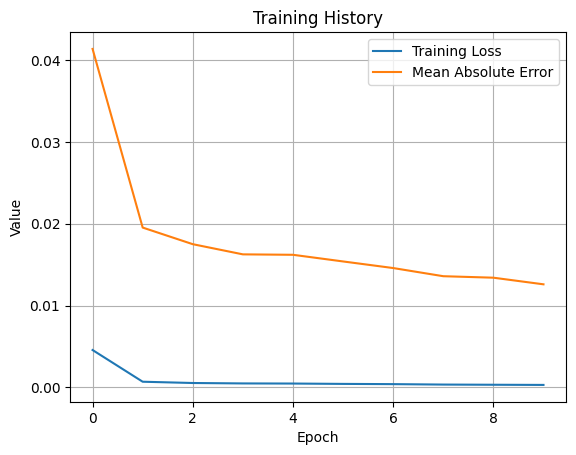

In [9]:
plt.plot(fit_result.history['loss'], label='Training Loss')
plt.plot(fit_result.history['mean_absolute_error'], label='Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print("Training Loss:", fit_result.history['loss'][-1])
# print("Training Accuracy:", fit_result.history['accuracy'][-1])
print("Evaluation Loss:", evaluate_result[0])
print("Evaluation Accuracy:", evaluate_result[1])

Training Loss: 0.000308545830193907
Evaluation Loss: 0.0013913150178268552
Evaluation Accuracy: 0.03069142997264862


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [12]:
predictions = model.predict(x_test).flatten()

38/38 [==============================] - 1s 4ms/step


In [13]:
predictions.shape

(1210,)

In [14]:
predictions[0]

0.5089968

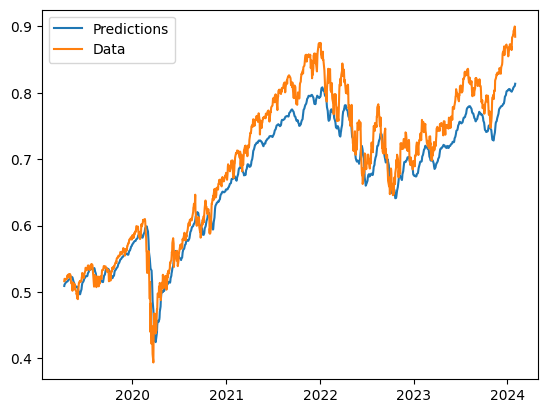

In [15]:
predictions

plt.plot(dates_test, predictions)
plt.plot(dates_test, y_test)
plt.legend(['Predictions', 'Data'])

In [17]:
predictions_train = model.predict(x_train).flatten()
# scaler = MinMaxScaler()
# predictions_train = scaler.inverse_transform(predictions_train)

152/152 [==============================] - 1s 4ms/step


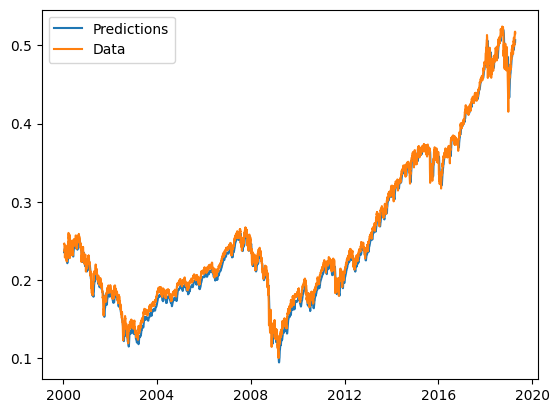

In [18]:
plt.plot(dates_train, predictions_train)
plt.plot(dates_train, y_train)
plt.legend(['Predictions', 'Data'])

In [19]:
x_train, y_train, predictions_train


(array([[0.24652866, 0.2360286 , 0.23653478, ..., 0.24220632, 0.24548619,
         0.24839723],
        [0.2360286 , 0.23653478, 0.23678692, ..., 0.24548619, 0.24839723,
         0.24651361],
        [0.23653478, 0.23678692, 0.24394127, ..., 0.24839723, 0.24651361,
         0.24665662],
        ...,
        [0.49927177, 0.50305403, 0.50059087, ..., 0.51339226, 0.51451941,
         0.51703154],
        [0.50305403, 0.50059087, 0.50248574, ..., 0.51451941, 0.51703154,
         0.51760171],
        [0.50059087, 0.50248574, 0.5060535 , ..., 0.51703154, 0.51760171,
         0.5142955 ]]),
 array([0.24651361, 0.24665662, 0.24471278, ..., 0.51760171, 0.5142955 ,
        0.51617911]),
 array([0.2356422 , 0.23491141, 0.23645273, ..., 0.50327575, 0.5051856 ,
        0.5067361 ], dtype=float32))